In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import geopandas
import shapely
import fiona
import geopandas as gp

from datetime import datetime

In [5]:
dataframes = []
for f in os.listdir("fox"):
    print(f)
    df = pd.read_csv(os.path.join("fox", f), parse_dates=[4])
    dataframes.append(df)

fox_df = pd.concat(dataframes)

flyingfox_april_june.csv
flyingfox_jan_mar.csv
flyingfox_jul_sep.csv
flyingfox_oct_dec.csv


In [6]:
fox_gdf = gp.GeoDataFrame(fox_df, geometry=geopandas.points_from_xy(fox_df.Longitude, fox_df.Latitude))

fox_gdf.head()

,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification,geometry
0,Fraser Coast,"Dundowran, O'Reagans Creek CP",-25.268200,152.727200,2019-05-17,True,0,0.0,0,0,0,41,330.0,POINT (152.72720 -25.26820)
1,Fraser Coast,"Dundowran Beach, Ocean Park Drive, Petersons Park",-25.270079,152.745372,2019-05-17,True,0,0.0,0,0,0,249,760.0,POINT (152.74537 -25.27008)
2,Fraser Coast,"Maryborough, Saltwater Creek",-25.473400,152.722400,2019-05-17,True,0,0.0,0,0,0,90,392.0,POINT (152.72240 -25.47340)
3,Fraser Coast,"Toogoom, Shellcot Street",-25.255865,152.692160,2019-05-17,True,0,0.0,0,0,0,271,NaN,POINT (152.69216 -25.25587)
4,Fraser Coast,"Maryborough, Tinana Island,",-25.560860,152.712160,2019-05-16,True,0,0.0,0,0,0,91,534.0,POINT (152.71216 -25.56086)


C:\Users\amand\anaconda3\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


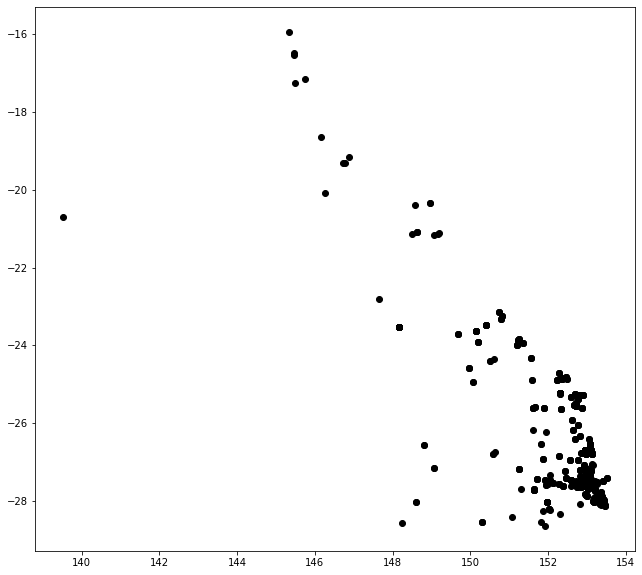

In [8]:

colors = 9
cmap = 'plasma'
figsize = (16, 10)
plotvar = 'Name of camp'
scheme = 'equal interval'


ax = fox_gdf.plot(plotvar, figsize=figsize, k = colors, legend=True, color='black')

In [52]:
zip_file_name = "maps\qld_locality_polygon_shp.zip"
shp_file_name = "QLD_LOCALITY_POLYGON_shp"

In [49]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [50]:
print("unzipping")
map_file = unzip_zipfile(zip_file_name)

print("done")

unzipping
done


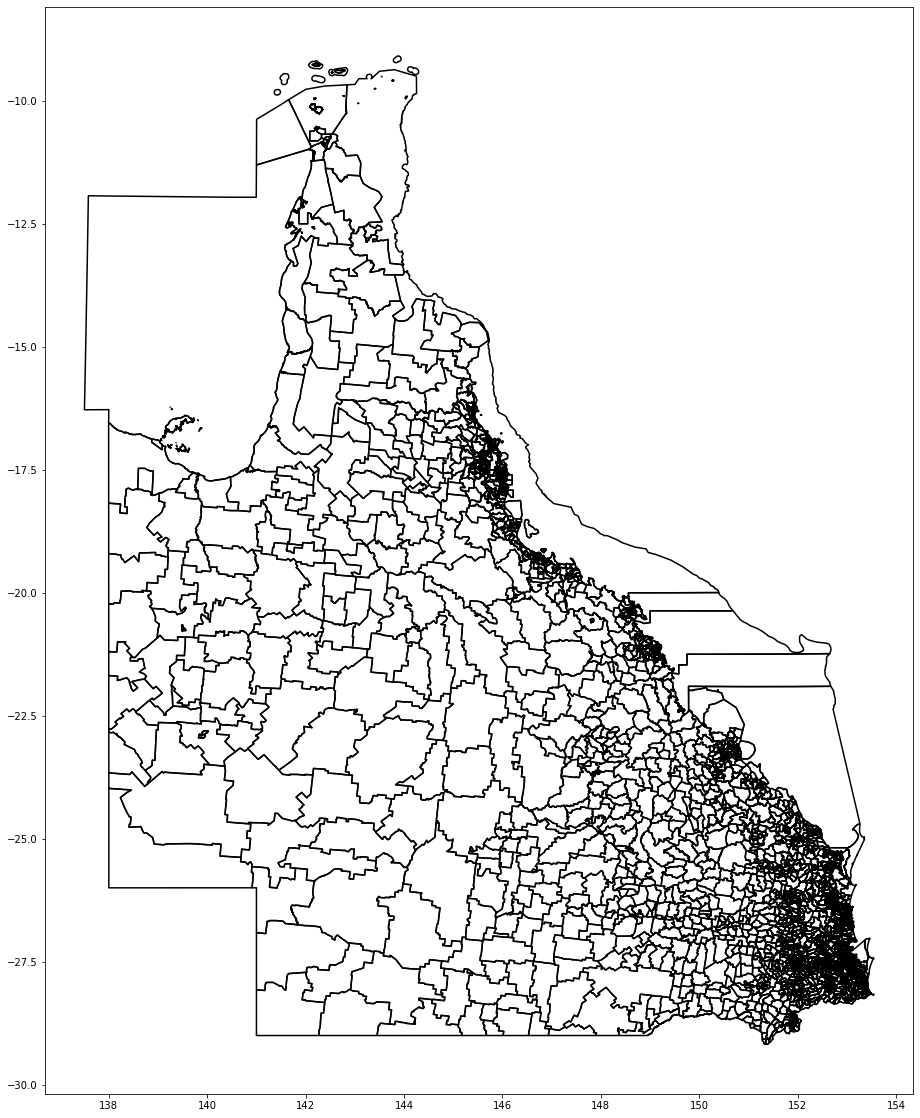

In [61]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.head(7)

cols_to_drop = ["QLD_LOCA_1", "QLD_LOCA_3", "QLD_LOCA_4", "QLD_LOCA_6", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(7)



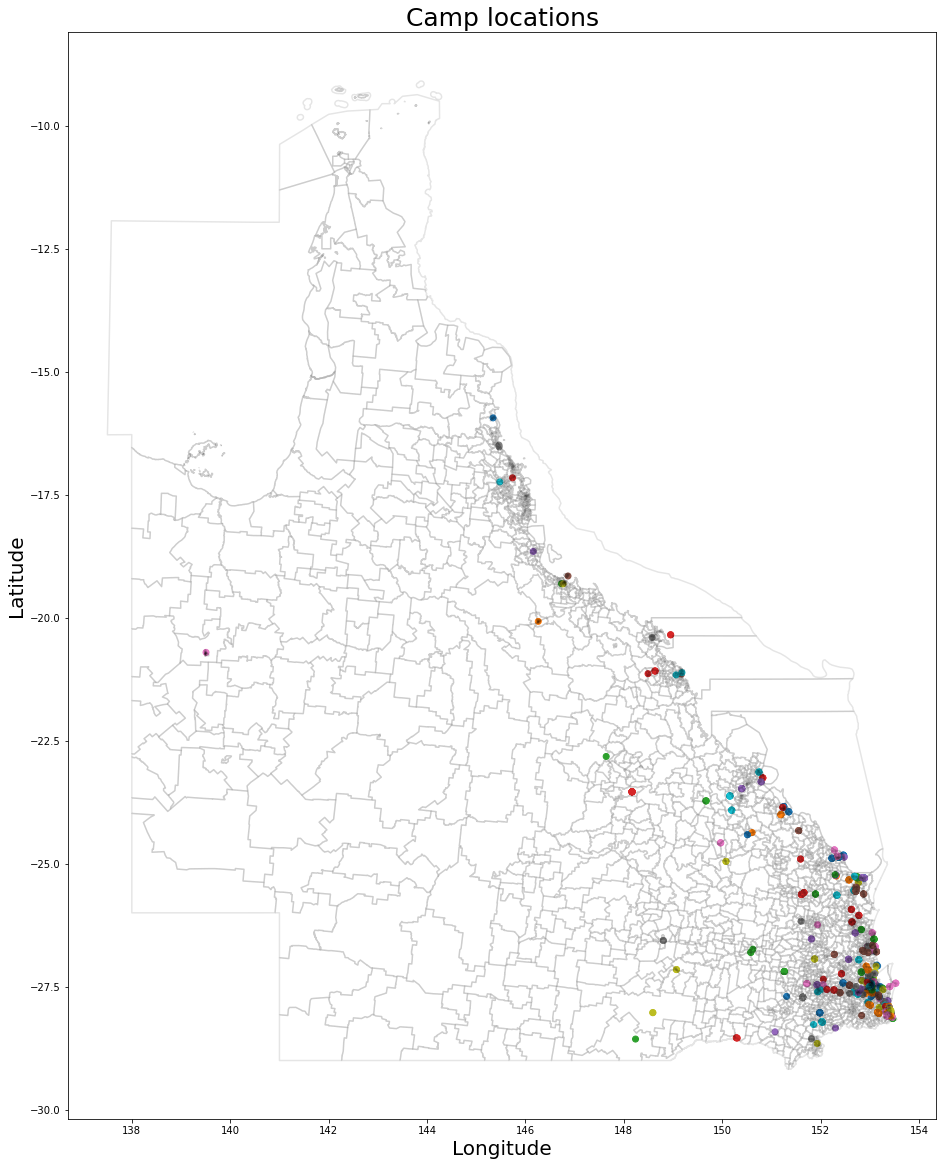

In [67]:
base = burbs.boundary.plot(figsize=(160,20), alpha=0.1, edgecolor='black') 
fox_gdf.plot(plotvar, figsize=(160,20), k = colors, legend=False, ax=base)
plt.title("Camp locations", fontsize=25)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show()